# How Have Marriages Changed Over the Years?

Our client is a dating coach, and she the same question about her country's marriage trends and wished to gain more insight how it could impact her clients.

For our clients we will explore how the following
1. The Crude Marriage Rate (CRM) A look at a population's general inclinations toward getting married
2. The average age of the bride and groom at first marriage to how late or early in adulthood people are marrying
3. And the age group of first marriage, for a detailed look at what ages are the most common for men and women, and if there is a trend in delaying marriage. 

Analyzing these trends will reveal the people's expectation and preferences when it comes to planning out their relationships.

## What Data Do We Have At out Disposal?
Our our explorations we have pulled data from two sources: 
1. [Eurostat](https://ec.europa.eu/eurostat/web/main/home) - Provides and harmonizes statistics across member states of the European Union
2. [BDL](https://bdl.stat.gov.pl/bdl/start) - The Local Data Bank (BDL). Poland's largest database for national metrics

From BDL
- *Marriages Contracted by Age of Newlyweds* - Provides the age grouping of men and women at time of marriage
- *Marriages Contracted by Year* - The year and total marriages
- *Poland Population* - Total Population of the country from 2005

From Eurostat
- *Eu CMR* - Provides the European Union's crude marriage rate
- *Marriage by Singular Age* - Provides the total number of marriages for each age of both groom and bride for each year
 

## Loading the Data

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [87]:
df_female = pd.read_csv('data/bride age group.csv', sep=';')
df_male = pd.read_csv('data/groom age group.csv', sep=';')
df_total_marriages = pd.read_csv('data/marriages_contracted_per_year.csv', sep=';')
# df_pop = pd.read_csv('data/poland_population.csv', sep=';') 
df_pop = pd.read_csv('data/poland_population_2005.csv', sep=';') 
# df_eu_cmr = pd.read_csv('data/tps00206 EU and Poland Crude Marraige Rate.csv')
df_eu_cmr = pd.read_csv('data/tps00206 EU CMR 2001.csv')
# df_ama_female = pd.read_csv('data/tps00014 Mean Female Age at Marriage.csv')
# df_ama_male = pd.read_csv('data/tps00014 Mean Male Age at Marriage.csv')
df_sing_age = pd.read_csv('data/poland_marriages_by_age_gender_year.csv')

plt.style.use('./executive_report.mplstyle')

## Data Wrangling

Our first task is to clean and transform the data to perform our analysis.

### Marriages by Age Group

In [88]:
# Denoting sex for each
df_female['sex'] = 'female'
df_male['sex'] = 'male'

# Dropping the rows representing total marriages regardless of age group 
df_female = df_female[df_female['Age of females'] != 'females total']
df_male = df_male[df_male['Age of males'] != 'males total']

# Dropping counterpart age of female and age of male columns
df_female.drop(columns='Age of males', inplace=True)
df_male.drop(columns='Age of females', inplace=True)

# Rename to age group
df_female.rename(columns={'Age of females' : 'age group'}, inplace=True)
df_male.rename(columns={'Age of males' : 'age group'}, inplace=True)

# print(df_female.head())
# print(df_male.head())

In [89]:
# Concatenating and renaming the columns
df_marriage = pd.concat([df_male, df_female], axis=0)
df_marriage.drop(
    columns=['Code','Name', 'Location', 'Types of marriages', 'Measure Unit', 'Attribute', 'Unnamed: 10'],
    inplace=True)

del(df_female, df_male)
df_marriage.head(5)

,age group,Year,Value,sex
14,under 20 years,2010,1320,male
15,under 20 years,2011,1090,male
16,under 20 years,2012,911,male
17,under 20 years,2013,716,male
18,under 20 years,2014,619,male


Our client specified that she had a focus on people dating in their early adulthood to late 30's, so we will group all ages past 40 into a single age group. 

In [90]:
new_age_dict = {
    'under 20 years' : '<20',
    '40-49' : '+40',
    '50-59' : '+40',
    '60 and more' : '+40'
}

df_marriage['age group'].replace(new_age_dict, inplace= True)
df_marriage = df_marriage.groupby(['Year', 'sex', 'age group'])['Value'].sum().reset_index()

df_marriage.head(6)

,Year,sex,age group,Value
0,2010,female,+40,13816
1,2010,female,20-24,79746
2,2010,female,25-29,89646
3,2010,female,30-34,26972
4,2010,female,35-39,9150
5,2010,female,<20,9007


To aid us, we will compute the percentage of the total of marriages that each age group contributes and the age groups rank, to indicate the order in which age group contributes to total marriages that year.

In [91]:
df_marriage['% of total'] = df_marriage['Value'] / df_marriage.groupby(['Year','sex'])['Value'].transform('sum')
df_marriage['rank'] = df_marriage.groupby(['Year','sex'])['Value'].rank(ascending=False)
df_marriage.head(12)


,Year,sex,age group,Value,% of total,rank
0,2010,female,+40,13816,0.060507,4.0
1,2010,female,20-24,79746,0.349247,2.0
2,2010,female,25-29,89646,0.392604,1.0
3,2010,female,30-34,26972,0.118124,3.0
4,2010,female,35-39,9150,0.040072,5.0
5,2010,female,<20,9007,0.039446,6.0
6,2010,male,+40,20041,0.087769,4.0
7,2010,male,20-24,44683,0.195689,2.0
8,2010,male,25-29,103417,0.452914,1.0
9,2010,male,30-34,44104,0.193153,3.0


In [92]:
# figure, axes = plt.subplots(2,1)
# plt.figure(figsize=(10,8))

# for i, sex in enumerate(df_marriage['sex'].unique()):
#     dt_temp = df_marriage[df_marriage['sex'] == sex]
#     sns.lineplot(dt_temp, x='Year', y='Value', ax=axes[i], hue='age group')

In [93]:
# figure, axes = plt.subplots(2,1)
# plt.figure(figsize=(10,8))

# for i, sex in enumerate(df_marriage['sex'].unique()):
#     dt_temp = df_marriage[df_marriage['sex'] == sex]
#     sns.lineplot(dt_temp, x='Year', y='% of total', ax=axes[i], hue='age group')

In [94]:
# figure, axes = plt.subplots(2,1)
# plt.figure(figsize=(10,8))

# for i, sex in enumerate(df_marriage['sex'].unique()):
#     dt_temp = df_marriage[(df_marriage['sex'] == sex) & (df_marriage['age group'] != '<20') ]
#     sns.lineplot(dt_temp, x='Year', y='rank', ax=axes[i], hue='age group')
#     axes[i].invert_yaxis()  # Invert the y-axis for the specific axes


### Total Marriages by Year

In [95]:
df_total_marriages = df_total_marriages.loc[:, ['Year','Value']]
df_total_marriages.head(5)

,Year,Value
0,1995,207081
1,1996,203641
2,1997,204850
3,1998,209430
4,1999,219398


In [96]:

# plt.figure(figsize=(10,6))

# # ----- Axis Setup ----- #
# ax1 = plt.gca()
# # ax2 = ax1.twinx()

# # ----- Plots ----- #
# sns.lineplot(df_total_marriages, x='Year', y='Value', label='Total Marriages', ax=ax1)
# # sns.lineplot(df_ama[df_ama['sex'] == 'male'], x ='year', y ='ave_age', label= 'Ave Age of Groom', ax=ax2, linestyle='--')
# # sns.lineplot(df_ama[df_ama['sex'] == 'female'], x ='year', y ='ave_age',label= 'Ave Age of Bride', ax=ax2, linestyle=':')
# # sns.lineplot(weighted_avg_df[weighted_avg_df['sex'] == 'M'], x ='TIME_PERIOD', y ='Weighted_Ave_Age', label= 'Ave Age of Groom', ax=ax2, linestyle='--')
# # sns.lineplot(weighted_avg_df[weighted_avg_df['sex'] == 'F'], x ='TIME_PERIOD', y ='Weighted_Ave_Age', label= 'Ave Age of Bride', ax=ax2, linestyle=':')

# # ----- Title Formatting ---- #
# plt.title('Marriage Rates been heavily influenced by economic factors', loc='left', ha='left')

# # ----- Axis Formatting ----- #
# ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}K'.format(y/1000)))
# ax1.set_ylabel(ylabel='Number of Marriages')
# # ax2.set_ylabel(ylabel='Age of Marriage')

# ax1.grid(False)
# # ax2.grid(False)

# # ----- Legend Formatting ----- #
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# # lines_2, labels_2 = ax2.get_legend_handles_labels()
# # ax2.get_legend().remove()
# # ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.1, 1))

# plt.show()

### Total Population

In [97]:
df_pop = df_pop[['Year', 'Value']].dropna(axis=0, how='any')
df_pop.head(5)

,Year,Value
0,2005,38157055.0
1,2006,38125479.0
2,2007,38115641.0
3,2008,38135876.0
4,2009,38167329.0


### Poland's Crude Marriage Rate


In [98]:

df_cmr = pd.merge(df_total_marriages, df_pop, on='Year', how='outer')
df_cmr = df_cmr.dropna().reset_index(drop=True)

df_cmr.columns = ['year', 'marriages', 'population']
df_cmr['cmr'] = (df_cmr['marriages'] / df_cmr['population'] * 1000).round(1)
df_cmr.drop(columns=['marriages', 'population'], inplace=True)

df_cmr.head(10)

,year,cmr
0,2005,5.4
1,2006,5.9
2,2007,6.5
3,2008,6.8
4,2009,6.6
5,2010,5.9
6,2011,5.4
7,2012,5.3
8,2013,4.7
9,2014,4.9


### EU's Crude Marriage Rate

In [99]:
df_eu_cmr = df_eu_cmr[df_eu_cmr['geo'] == 'EU27_2020']
df_eu_cmr = df_eu_cmr.loc[:, ['TIME_PERIOD', 'OBS_VALUE']]
df_eu_cmr.columns = ['year', 'cmr eu']
df_eu_cmr.head(10)

,year,cmr eu
0,2001,4.9
1,2002,4.9
2,2003,4.8
3,2004,4.8
4,2005,4.8
5,2006,4.8
6,2007,5.0
7,2008,4.8
8,2009,4.6
9,2010,4.4


In [100]:
df_cmr = pd.merge(df_cmr, df_eu_cmr, on='year', how='outer')

del(df_eu_cmr)

df_cmr = df_cmr.sort_values('year').reset_index(drop=True)
df_cmr.head(10)

,year,cmr,cmr eu
0,2001,NaN,4.9
1,2002,NaN,4.9
2,2003,NaN,4.8
3,2004,NaN,4.8
4,2005,5.4,4.8
5,2006,5.9,4.8
6,2007,6.5,5.0
7,2008,6.8,4.8
8,2009,6.6,4.6
9,2010,5.9,4.4


### Ave Age of First Marriage

To get an accurate number for the average age at time of marriage, we will compute the weighted average using the number of marriages contracted at each age. Other datasets have this information already formatted, but often start at 2011 only. using this method we can get the same metric starting from 1995.

In [101]:
df_sing_age.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_NSINAGEC(1.0),5/9/2024 23:00,A,NR,F,Y15,PL,1995,0,NaN
1,ESTAT:DEMO_NSINAGEC(1.0),5/9/2024 23:00,A,NR,F,Y15,PL,1996,0,NaN
2,ESTAT:DEMO_NSINAGEC(1.0),5/9/2024 23:00,A,NR,F,Y15,PL,1997,0,NaN
3,ESTAT:DEMO_NSINAGEC(1.0),5/9/2024 23:00,A,NR,F,Y15,PL,1998,0,NaN
4,ESTAT:DEMO_NSINAGEC(1.0),5/9/2024 23:00,A,NR,F,Y15,PL,1999,0,NaN


In [102]:
# Correcting 'age' to be an integer
df_sing_age['age'] = df_sing_age['age'].str.lstrip('Y').astype(int)

# Calculating the weighted average
df_avg_age = df_sing_age.groupby(['TIME_PERIOD', 'sex']).apply(
    lambda x: (x['age'] * x['OBS_VALUE']).sum() / x['OBS_VALUE'].sum()
).round(1).reset_index(name='ave age')

df_avg_age.columns = ['year', 'sex', 'ave age']
df_avg_age.replace(to_replace={'F': 'female', 'M':'male'}, inplace=True)

df_avg_age.tail(10)

,year,sex,ave age
46,2018,female,27.5
47,2018,male,29.7
48,2019,female,27.8
49,2019,male,30.0
50,2020,female,28.0
51,2020,male,30.2
52,2021,female,28.2
53,2021,male,30.4
54,2022,female,28.6
55,2022,male,30.8


In [103]:
## Exporting Dataframes for Dash app

if False:
    df_avg_age.to_csv(f'./data/dash_data/average_marriage_age.csv')
    df_cmr.to_csv(f'./data/dash_data/crude_marriage_rate.csv')
    df_marriage.to_csv(f'./data/dash_data/marriage_by_age_group.csv')
    # df_pop.to_csv(f'./data/dash_data/df_.csv')
    df_total_marriages.to_csv(f'./data/dash_data/total_marriages.csv')


## Visualizing the Data

### Crude Marriage Rates

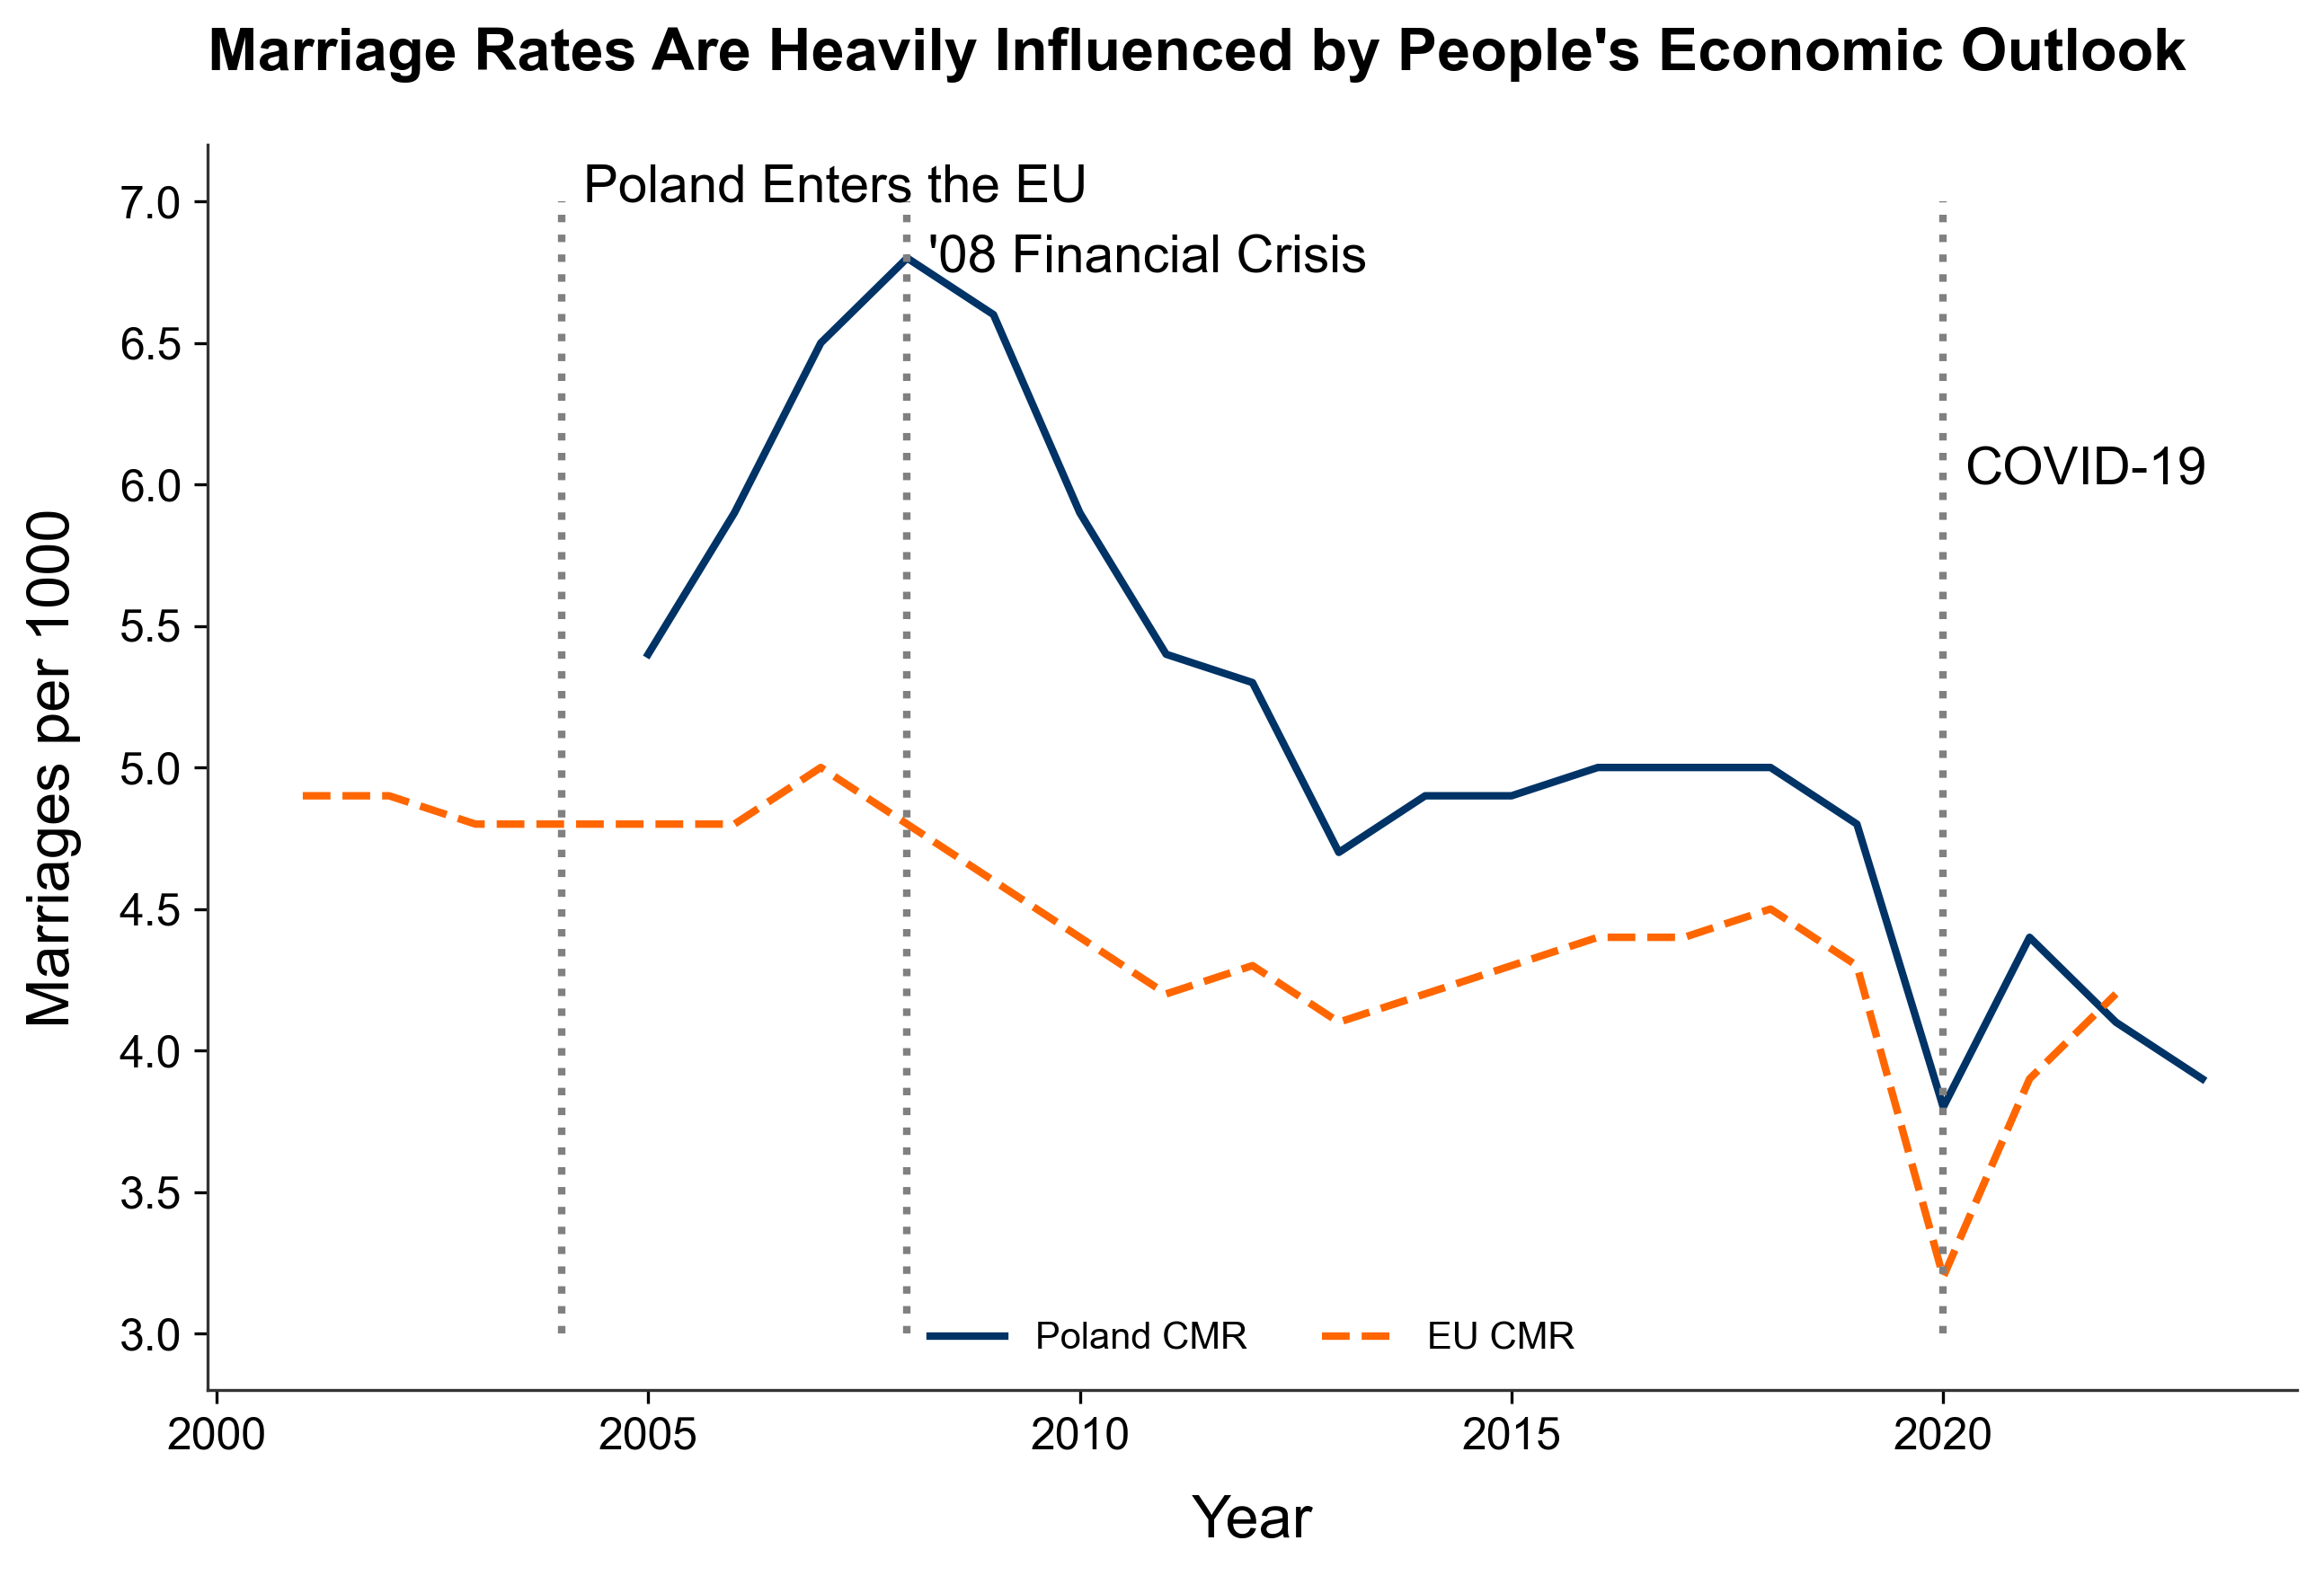

In [104]:

plt.figure(figsize=(10,6))

# ----- Axis Setup ----- #
ax1 = plt.gca()
# ax2 = ax1.twinx()

# ----- Plots ----- #
sns.lineplot(df_cmr, x='year', y='cmr', label='Poland CMR', ax=ax1)
sns.lineplot(df_cmr, x ='year', y ='cmr eu', label= 'EU CMR', ax=ax1, linestyle='--')

# ----- Title Formatting ---- #
plt.title('Marriage Rates Are Heavily Influenced by People\'s Economic Outlook', loc='left', ha='left')
plt.xlabel('Year')
# ----- Axis Formatting ----- #
# ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}K'.format(y/1000)))
ax1.set_ylabel(ylabel='Marriages per 1000')
# ax2.set_ylabel(ylabel='Age of Marriage')

ax1.grid(False)
# ax2.grid(False)

# ----- Legend Formatting ----- #
lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax2.get_legend().remove()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.1, 1))

# Legend
legend = plt.legend(title='', loc='lower center', ncol=len(df_avg_age['sex'].unique()))
legend.get_frame().set_facecolor('none') 
legend.get_frame().set_edgecolor('none') 

events = [[2004,"Poland Enters the EU", 7], [2008,'\'08 Financial Crisis', 6.75], [2020, 'COVID-19', 6.0]]

for event in events:
    plt.vlines(event[0],3,7,'gray',':', label=event[1],)
    plt.text(x = event[0]+.25, y = event[2], s= event[1])

plt.show()

Our chart shows that during times of positive or negative economic outlook, the marriage rates have grown or contracted accordingly. In 2004, Poland was admitted to the European Union with a positive expectation about the benefits it would bring to the national economy. And we can see a sharp increase in marriage rates until 2008.

After 2008, with the Financial Crisis, the marriage rate has been steadily decreasing. Unsurprisingly, we see a sharp drop in 2020, right as the COVID-19 Pandemic it at its highest concern.

Interestingly, Poland faired comparatively well in the 2008 recession, with GDP growth positive, and climbing from 2009 to 2011 <sup>[1](https://tradingeconomics.com/poland/full-year-gdp-growth)</sup>. This is contrasted with the period from 2014 to 2019 GDP where growth was consistently above 3%, and crude marriage rate averaged held steady at 5.0, still above the crude marriage rate of the European Union on average. We can infer two things, positive economic periods may be overshadowed by an individual's perception of economic security not to mention changes in society's attitude towards the important of marriage. This is partially evident, as with time Poland's Crude marriage rate begins to closely match that of the european union as a whole. 


### Average Age of Marriage

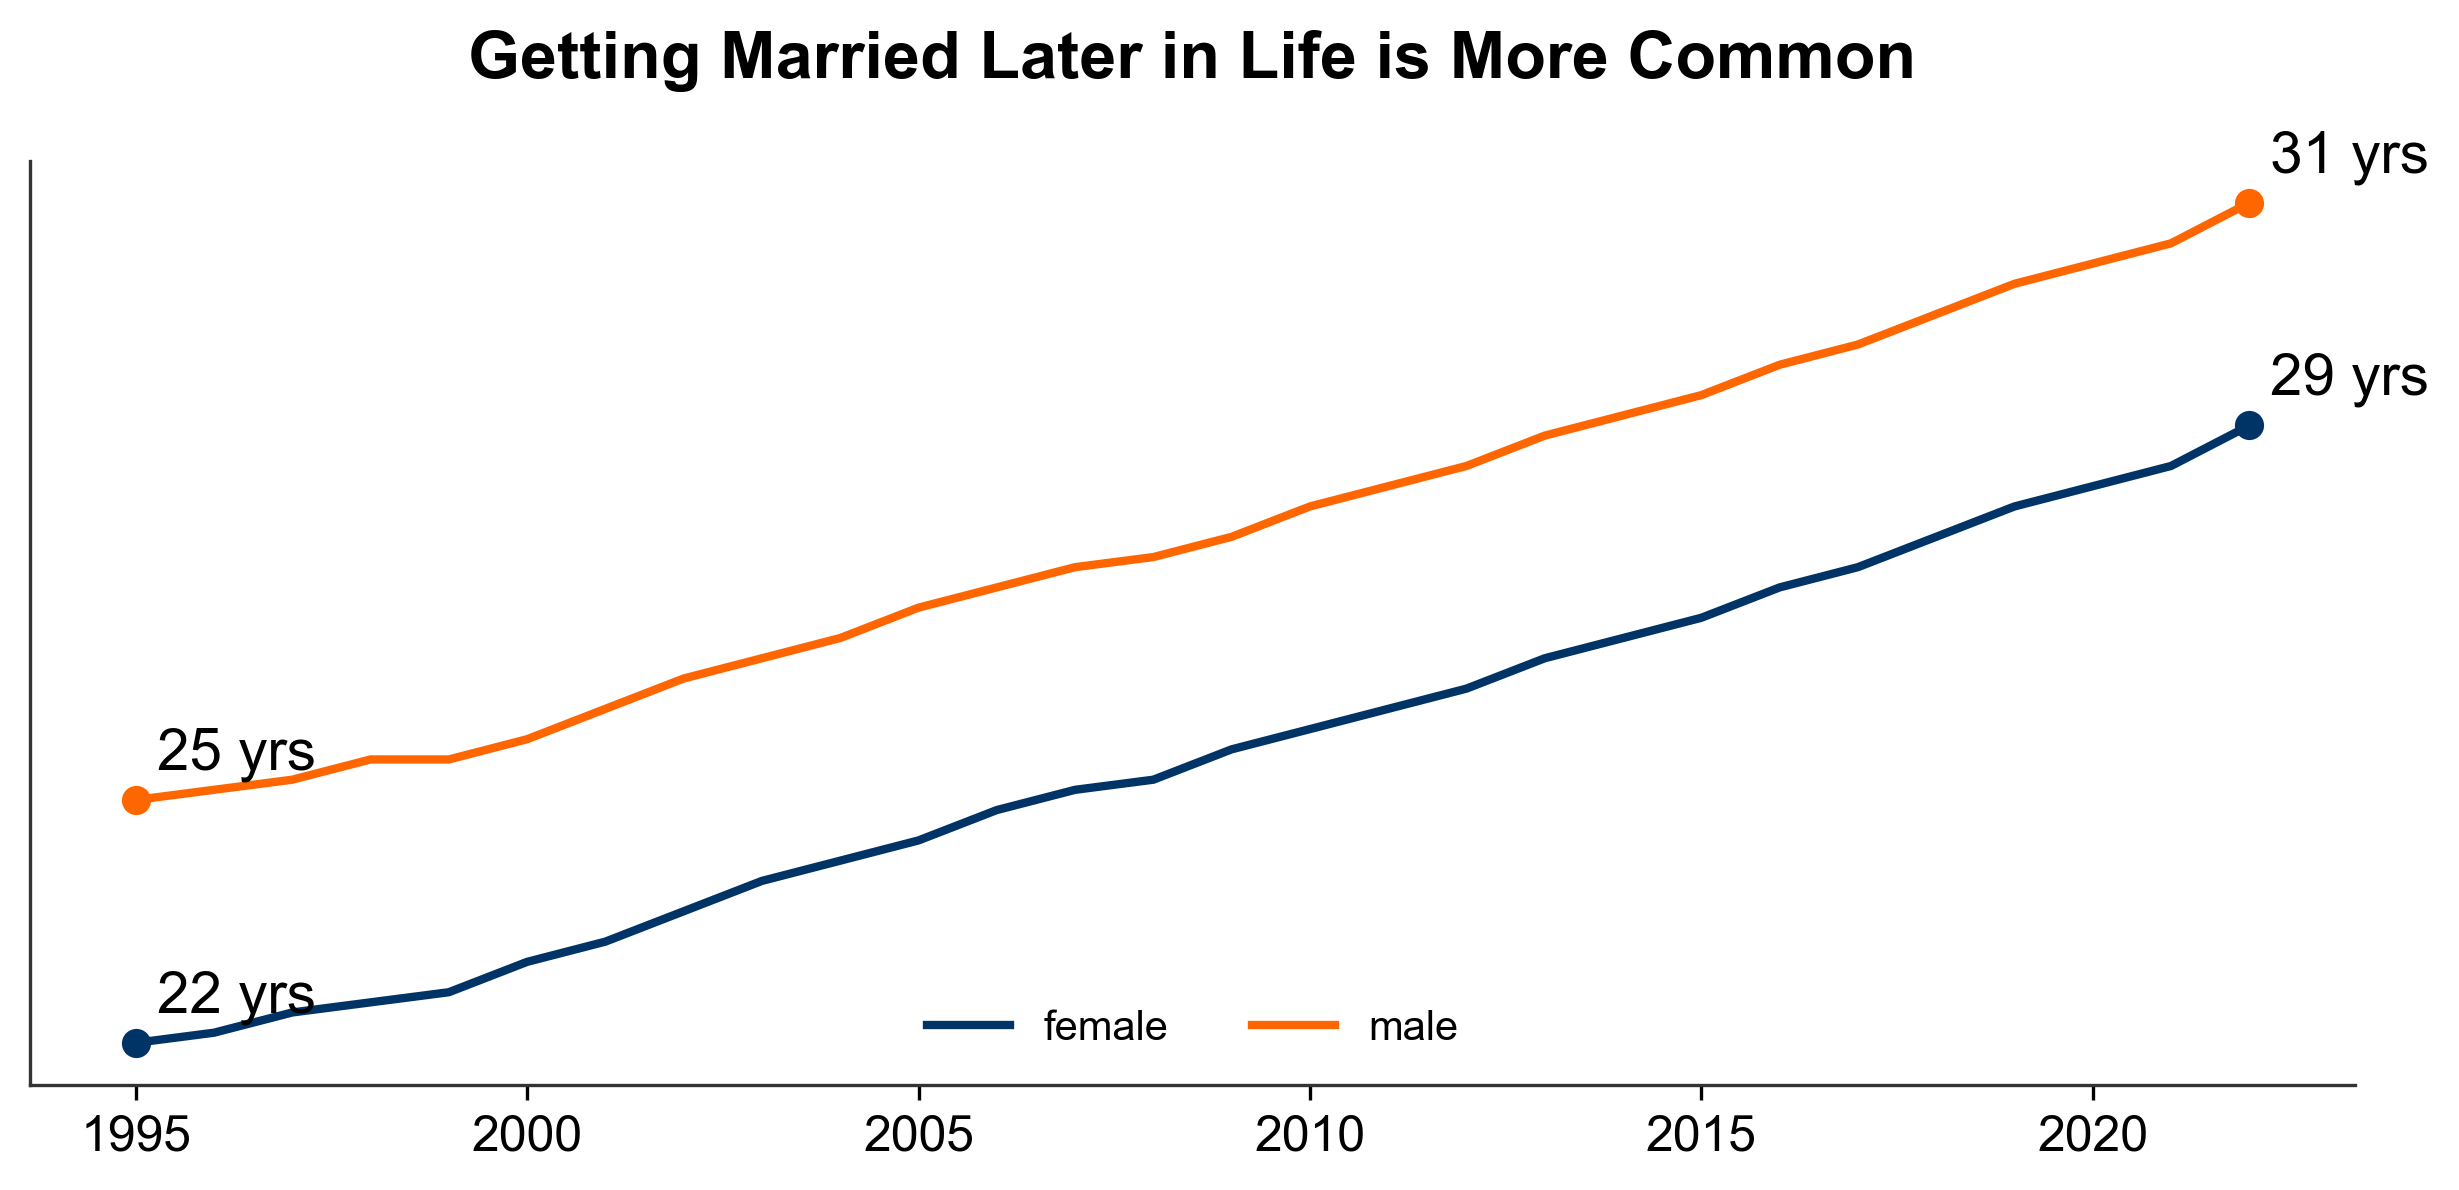

In [105]:
plt.figure(figsize=(10,4))

for sex in df_avg_age['sex'].unique():
    subset = df_avg_age[df_avg_age['sex'] == sex]
    plt.plot(subset['year'], subset['ave age'], label=sex)
    axis = plt.gca()
    axis.yaxis.set_visible(False)

    first_row = subset.iloc[[0]]  # Get the first row
    last_row = subset.iloc[[-1]]  # Get the last row
    # Combine them into a single DataFrame
    df_first_last = pd.concat([first_row, last_row])
    plt.scatter(df_first_last['year'], df_first_last['ave age'])

    for _, row in df_first_last.iterrows():
        text = plt.annotate(f"{row['ave age']:.0f}" + ' yrs',
                        xy = (row['year'], row['ave age']),
                        xytext =(5,11),
                        textcoords ='offset points',
                        ha='left', 
                        va='center',
                        fontsize =14
                        )
        
plt.yticks([])
plt.gca().yaxis.set_visible(False)
# plt.gca().spines['left'].set_visible(False)

# Legend
legend = plt.legend(title='', loc='lower center', ncol=len(df_avg_age['sex'].unique()))
legend.get_frame().set_facecolor('none') 
legend.get_frame().set_edgecolor('none') 

# Labels
plt.xlabel('')
plt.ylabel('Average Age')
plt.title('Getting Married Later in Life is More Common')

plt.show()

A prominent metric for tracking the perception of marriage is the average age of marriage. The general trends in the Western and Developed nations has been for marriages to be postponed until much later in life. Many factors come into play, such the need for establishing financial security, less importance on marriage, or tractional relationships, as well as s perception of the increased cost of having a family. 

For Poland, the trend is no different than what has been observed elsewhere. In fact, the average age for men and women has only creased year over year. With Men getting married 6 years later in life, with women getting married 7 years later in life on average. We will move forward and group teh number of marriages into specific age groups, so get a more granular look at how attitudes towards marriage have changed, and what age groups are becoming more common marriage. 

## Marriages By Age Groups

In [106]:
custom_palette = {
    '<20': 'red',
    '20-24': '#e60049',
    '25-29': '#9b19f5',
    '30-34': "#0bb4ff",
    '35-39': "#ffa300",
    '+40': 'grey'
}

In [107]:
# figure, axes = plt.subplots(2, 1, figsize=(12, 12))

# for i, sex in enumerate(df_marriage['sex'].unique()):
#     dt_temp = df_marriage[(df_marriage['sex'] == sex) & (df_marriage['age group'] != '<20')]
#     sns.lineplot(data=dt_temp, x='Year', y='Value', ax=axes[i], hue='age group', palette=custom_palette)
    
#     handles, labels = axes[i].get_legend_handles_labels()
#     order = [1,2,3,4,0] 
#     axes[i].legend([handles[idx] for idx in order], [labels[idx] for idx in order])
#     axes[i].set_title(f'Marriages Age Groups of {"Bride" if sex == "female" else "Groom"}')


# # Display the plot
# plt.tight_layout()
# plt.show()

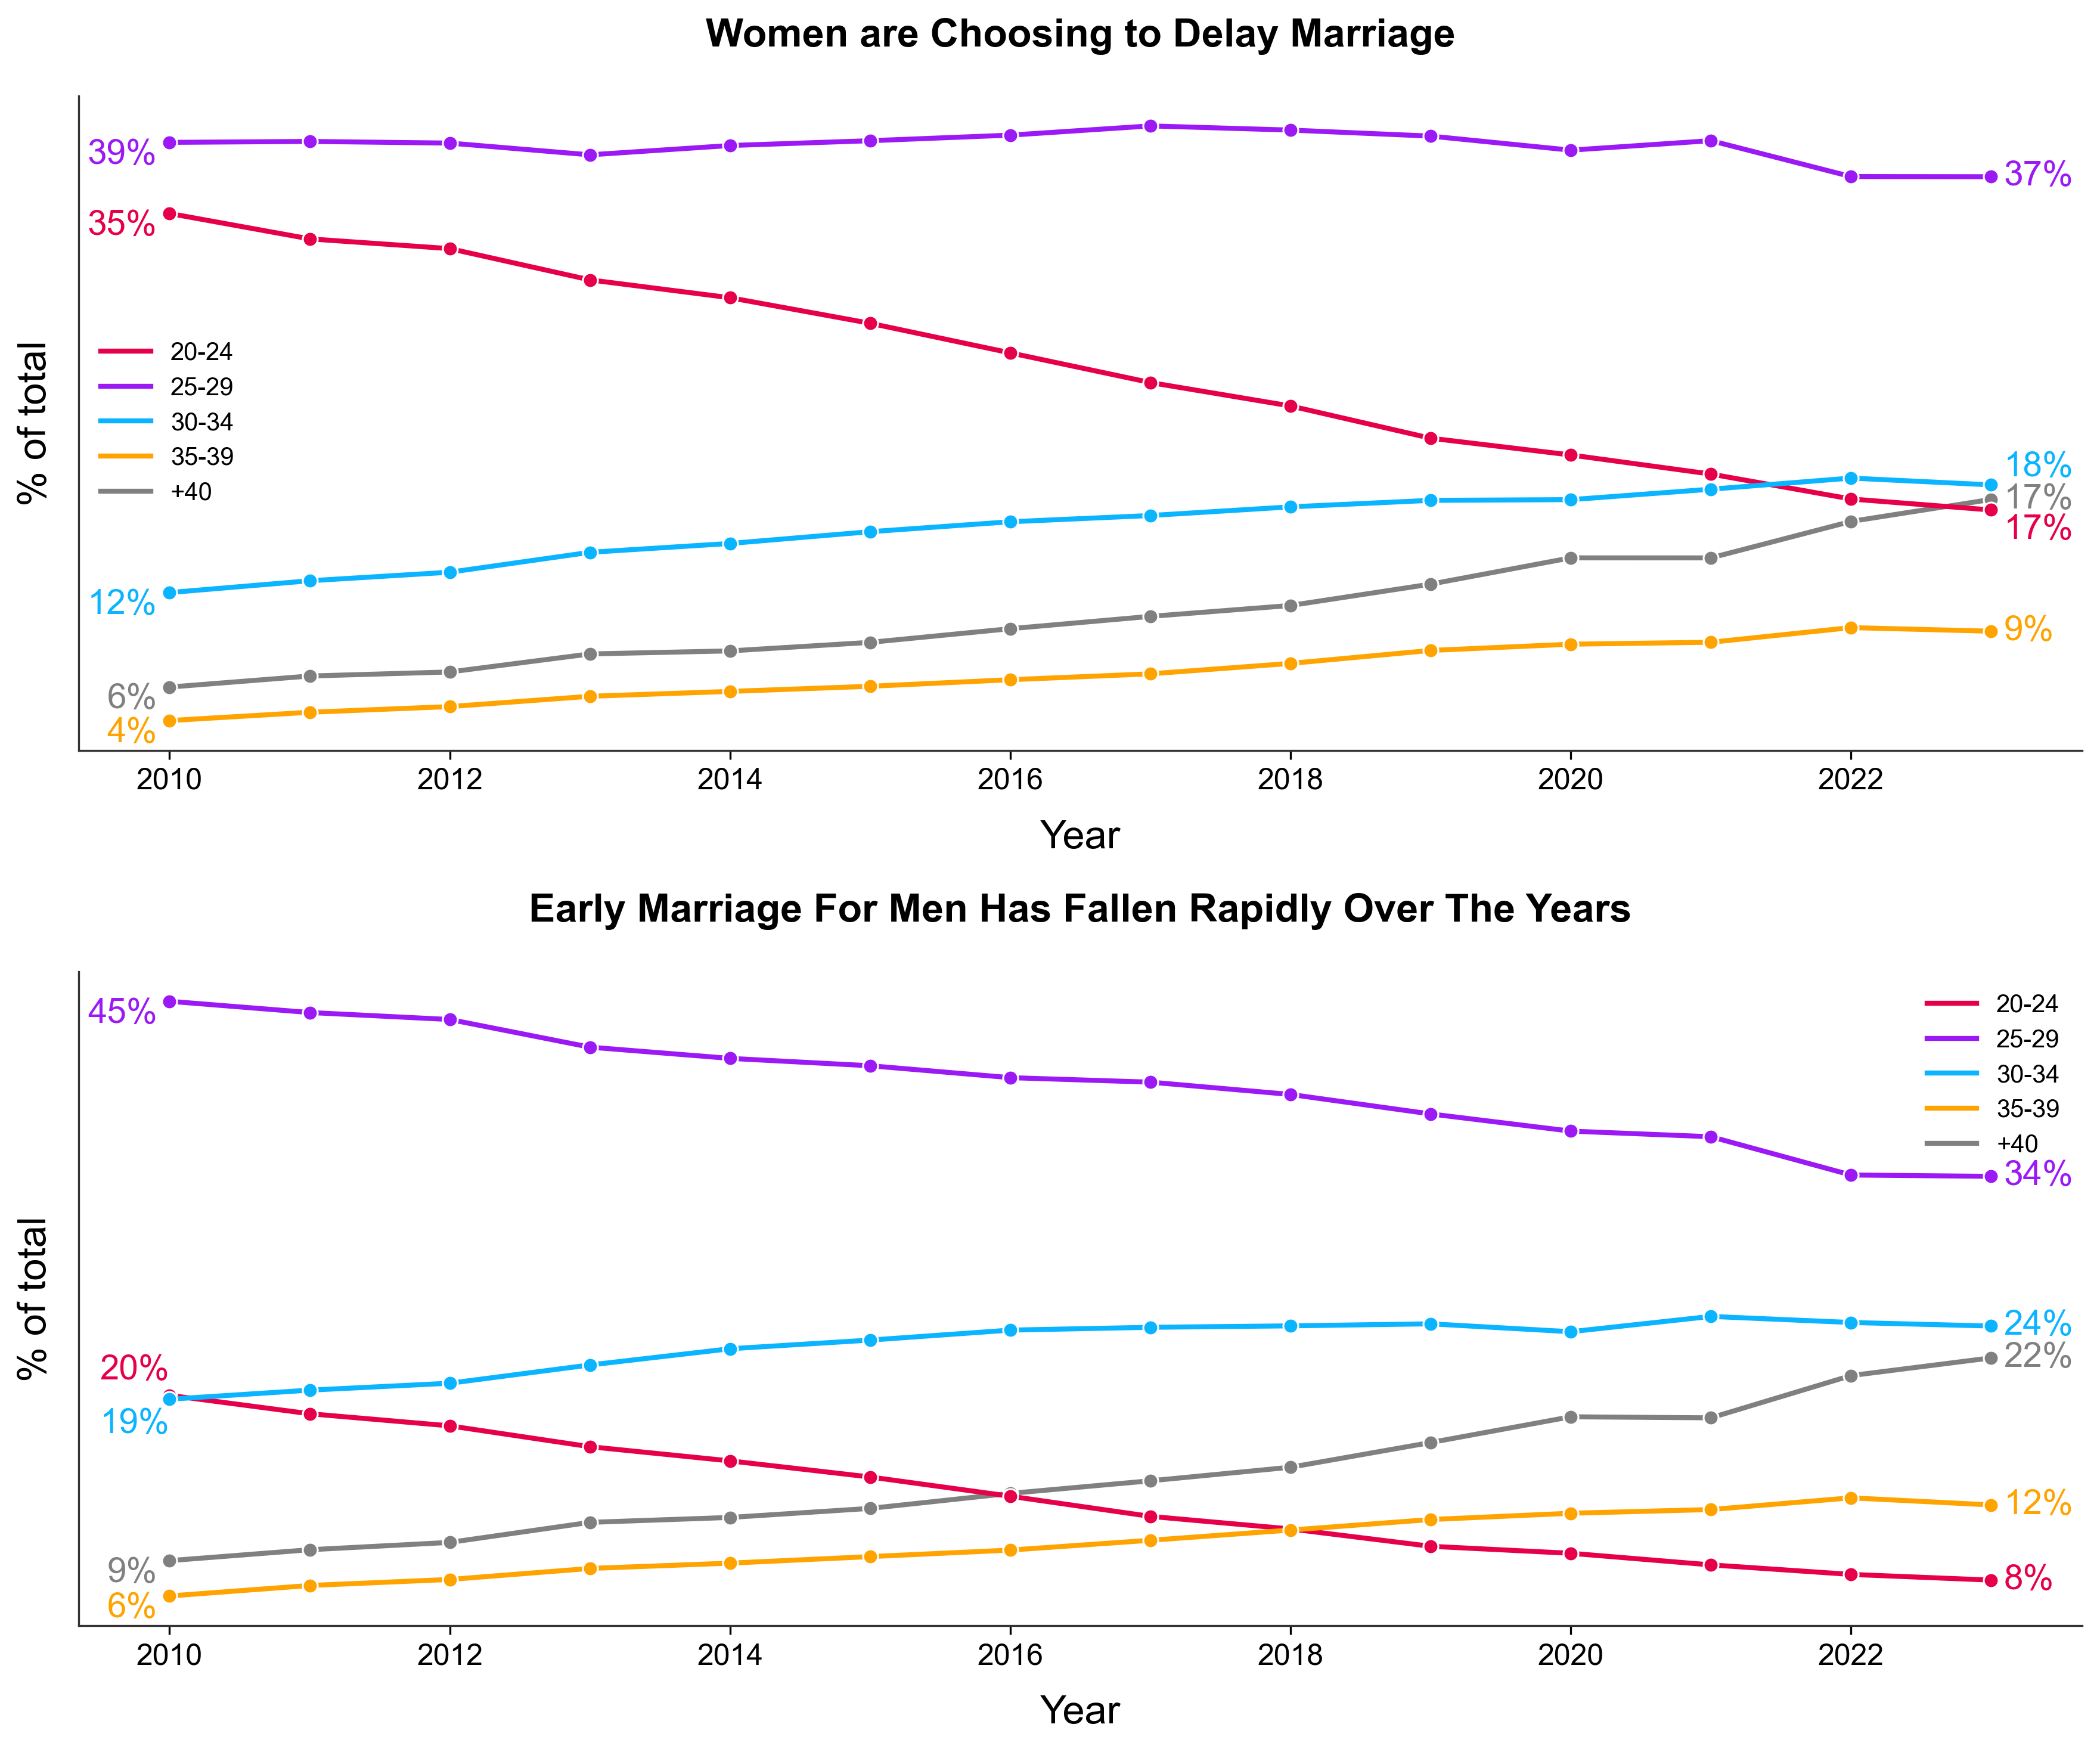

In [108]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
import matplotlib.ticker as mtick

for i, sex in enumerate(df_marriage['sex'].unique()):
    df_temp = df_marriage[(df_marriage['sex'] == sex) & (df_marriage['age group'] != '<20')]

    sns.lineplot(df_temp, x='Year', y='% of total', ax=axes[i], hue='age group', marker='o', palette=custom_palette)

    handles, labels = axes[i].get_legend_handles_labels()
    
    order = [1,2,3,4,0] 
    axes[i].legend([handles[idx] for idx in order], [labels[idx] for idx in order])
    axes[i].set_title(f'{"Women are Choosing to Delay Marriage" if sex == "female" else "Early Marriage For Men Has Fallen Rapidly Over The Years"}')
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))  # Assuming 'Value' is in the range [0, 1]
    
    for age_group in df_temp['age group'].unique():

        df_group = df_temp[df_temp['age group'] == age_group]
        last_row = df_group.iloc[-1]
        first_row = df_group.iloc[0]

        xy_pos_last = (5,0)
        xy_pos_first = (-5, -5)

        if sex == 'female':
            if age_group == '20-24':
                xy_pos_last = (5,-8)
            elif age_group == '30-34':
                xy_pos_last = (5,7)

        if sex == 'male':
            if age_group == '20-24':
                xy_pos_first = (0, 10)
            elif age_group == '30-34':
                xy_pos_first = (0, -10)

            
  

        last_text = axes[i].annotate("{:.0%}".format(last_row['% of total']),
                         xy = (last_row['Year'],last_row['% of total']),
                         xytext = xy_pos_last,
                         textcoords = 'offset points',
                         ha = 'left', 
                         va = 'center',
                         fontsize = 14,
                         color = custom_palette[age_group])
        
        first_text = axes[i].annotate("{:.0%}".format(first_row['% of total']),
                         xy = (first_row['Year'], first_row['% of total']),
                         xytext = xy_pos_first,
                         textcoords = 'offset points',
                         ha = 'right', 
                         va = 'center',
                         fontsize = 14,
                         color = custom_palette[age_group])
        
# Hide y-axis labels and spine if desired
for ax in axes:
    ax.set_yticks([])  # Remove tick marks
    ax.yaxis.set_ticks_position('none')  # Ensure no ticks are visible
plt.tight_layout()
plt.show()

#### Women
We can readily see the age group of 20-24 years old females has dropped quite significantly; by roughly 50% over the that last 14 years. This has been accompanied by a nearly equal increase in the number of marriages past the age of 30, while the age bracket for 25-29 years old has remained steady across the years. 

THis drop is not so surprising, considering trends that younger women are focused more on higher education and career, rather than starting a family, a trend seen often in the developed world. The age group of 25-29 on the other hand, still remains the popular age bracket for young women. 

What is interesting, and may be worth further investigation, is the age bracket of +40 years olds has nearly tripled from 6% to 17%. What may be leading women to choose marriage at this point in their lives? 


#### Men
For men the trend is very similar. Marriages by men in early twenties has dropped by 60% and late twenties by almost 20%.